In [2]:
%matplotlib agg
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from tqdm.notebook import tqdm

from IPython.display import clear_output

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import gridspec

import hw4_utils
import hw4_mnist

# nicer color map for visualizing both positive and negative attributions
hot = cm.get_cmap('hot', 128)
cool = cm.get_cmap('cool', 128)
binary = cm.get_cmap('binary', 128)
hotcold = np.vstack((binary(np.linspace(0,1,128)) * cool(np.linspace(0, 1, 128)),
                     hot(np.linspace(0, 1, 128))))
hotcold_cmap = ListedColormap(hotcold, name='hotcold')

# for latex in matplotlib:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

mnist_data = hw4_mnist.load_data()

In [2]:
m = hw4_mnist.MNISTModel()
#m._prepare_model() # retrain and save model
m.load()

In [3]:
for s in tqdm(mnist_data):
    preds = m.f_preds(s.X)
    print((preds == s.Y).mean())

0.97784
0.981
0.9785



# PART 1

In [4]:
import hw4_part1
hw4_part1.tqdm = tqdm

def show_attack(attacker, idxs, dat):  
    X = dat.X[idxs]
    Y = dat.Y[idxs]
    
    Xp = att.attack_batch(X, Y)

    for x, xp, yt, idx in list(zip(X, Xp, Y, idxs)):    
        y  = np.argmax(m.model.predict(x [np.newaxis, :, :, :])[0])
        yp = np.argmax(m.model.predict(xp[np.newaxis, :, :, :])[0])
    
        d = (x-xp).flatten()

        dnorms, dnorms_str = hw4_utils.norms(np.expand_dims(d, axis=0))
    
        lim = max(abs(np.min(d)), abs(np.max(d)))
        # make colorbar limits symmetric, with black being 0
    
        print(f"{yt}: {y} -> {yp} {dnorms_str}")

        fig = plt.figure(figsize=(6.5,3))
        gs = gridspec.GridSpec(1,3, width_ratios=[2,2,2])
        axs = [plt.subplot(gs[i]) for i in range(3)]
    
        fig.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.05, hspace=0)
    
        axs[0].set_axis_off()
        axs[1].set_axis_off()
        axs[2].set_axis_off()
    
        axs[0].imshow(x[:,:,0])
        axs[1].imshow(xp[:,:,0])
        c = axs[2].imshow((xp-x)[:,:,0], cmap=hotcold_cmap, vmin=-lim, vmax=lim)
        
        cax = fig.add_axes([axs[2].get_position().x1+0.01,
                            axs[2].get_position().y0,
                            0.1,
                            axs[2].get_position().y1 - axs[2].get_position().y0])
        
        fig.colorbar(mappable=c, cax=cax)
        
        fig.suptitle(f"instance={idx}, {y} $\\rightarrow$ {yp}, {dnorms_str}\n{str(att)}")
    
        display(fig)
        
    plt.close('all')

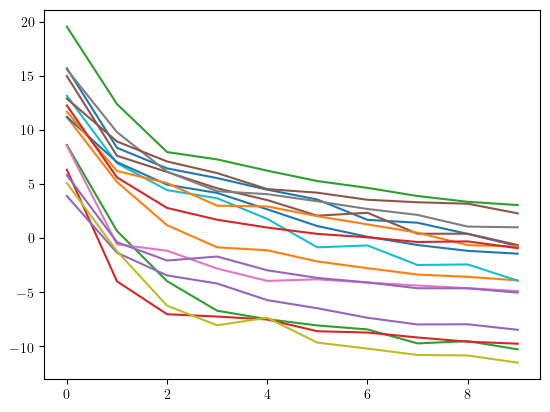

Success rate:  0.6875
Mean Distortion:  $L_0$=444.7273, $L_1$=65.6971, $L_2$=3.4129, $L_\infty$=0.2000


5: 5 -> 3 $L_0$=449.0000, $L_1$=59.6593, $L_2$=3.1887, $L_\infty$=0.2000


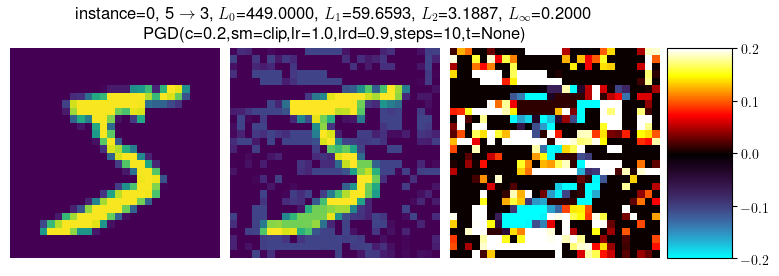

0: 0 -> 0 $L_0$=463.0000, $L_1$=69.6405, $L_2$=3.5329, $L_\infty$=0.2000


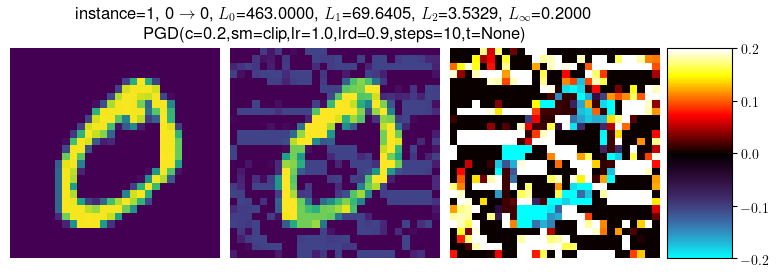

4: 4 -> 7 $L_0$=450.0000, $L_1$=69.2772, $L_2$=3.5203, $L_\infty$=0.2000


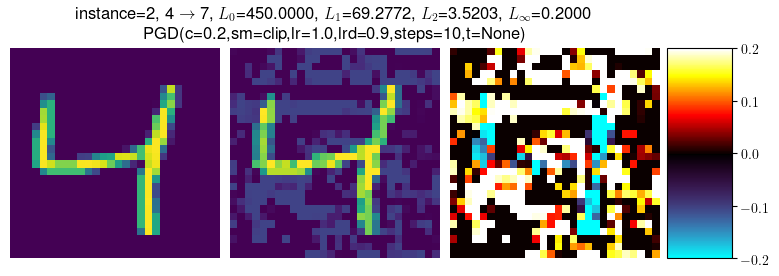

1: 1 -> 7 $L_0$=421.0000, $L_1$=60.3899, $L_2$=3.2449, $L_\infty$=0.2000


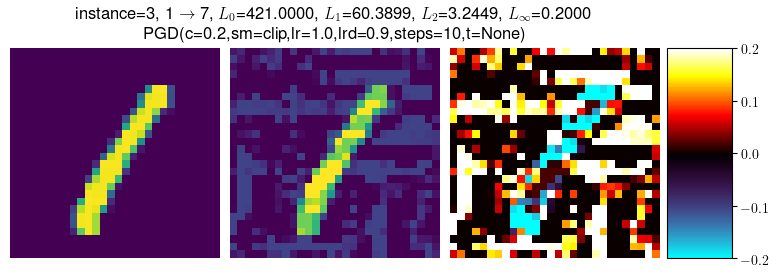

9: 9 -> 7 $L_0$=457.0000, $L_1$=63.8589, $L_2$=3.3377, $L_\infty$=0.2000


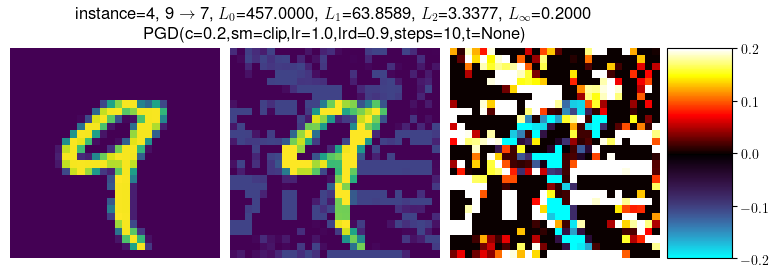

2: 2 -> 8 $L_0$=479.0000, $L_1$=65.7579, $L_2$=3.3752, $L_\infty$=0.2000


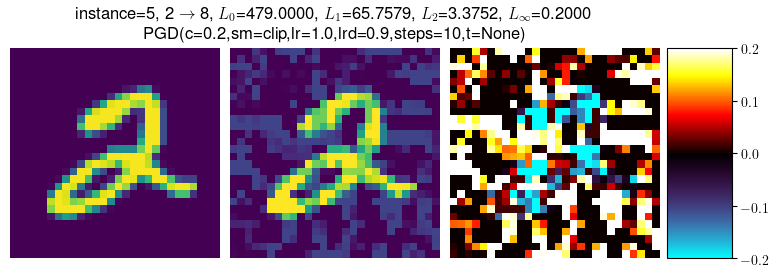

1: 1 -> 8 $L_0$=412.0000, $L_1$=62.0825, $L_2$=3.3302, $L_\infty$=0.2000


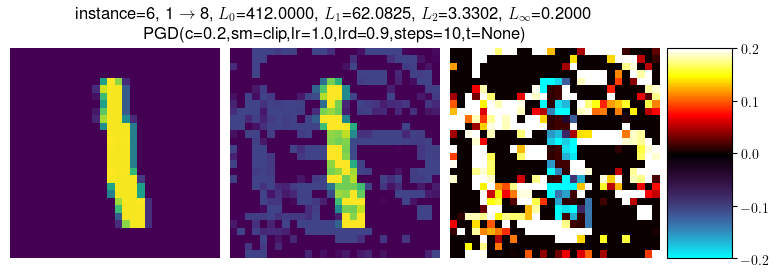

3: 3 -> 3 $L_0$=485.0000, $L_1$=68.4759, $L_2$=3.4710, $L_\infty$=0.2000


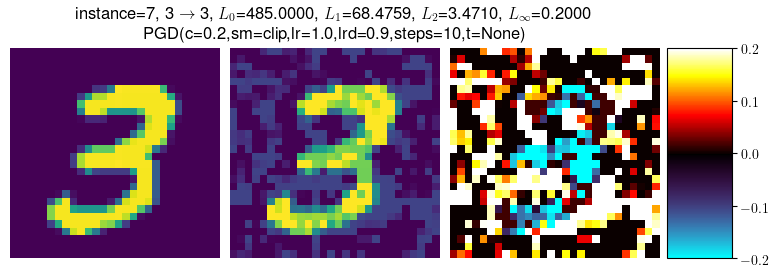

1: 1 -> 8 $L_0$=431.0000, $L_1$=67.0750, $L_2$=3.4920, $L_\infty$=0.2000


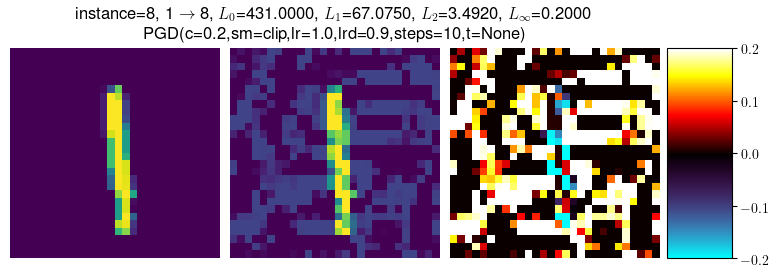

4: 4 -> 7 $L_0$=444.0000, $L_1$=67.1124, $L_2$=3.4757, $L_\infty$=0.2000


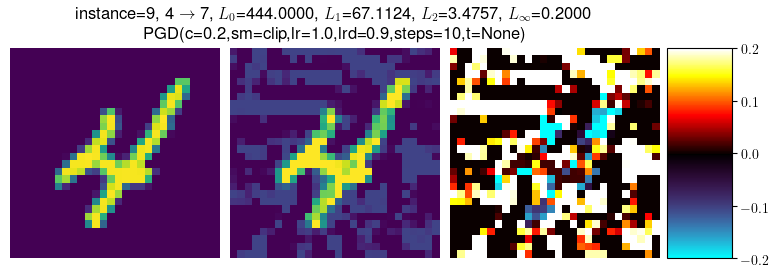

3: 3 -> 3 $L_0$=446.0000, $L_1$=60.7260, $L_2$=3.2552, $L_\infty$=0.2000


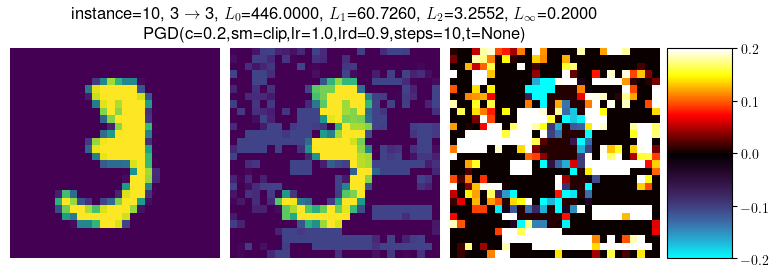

5: 5 -> 5 $L_0$=417.0000, $L_1$=58.6949, $L_2$=3.1774, $L_\infty$=0.2000


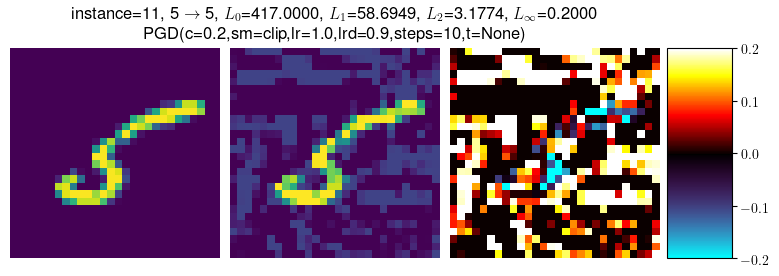

3: 3 -> 3 $L_0$=487.0000, $L_1$=71.4120, $L_2$=3.6061, $L_\infty$=0.2000


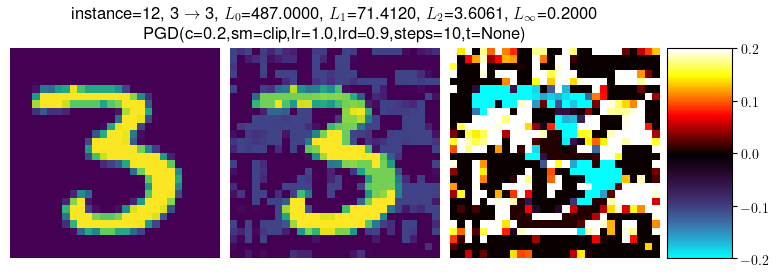

6: 6 -> 4 $L_0$=453.0000, $L_1$=70.8739, $L_2$=3.5775, $L_\infty$=0.2000


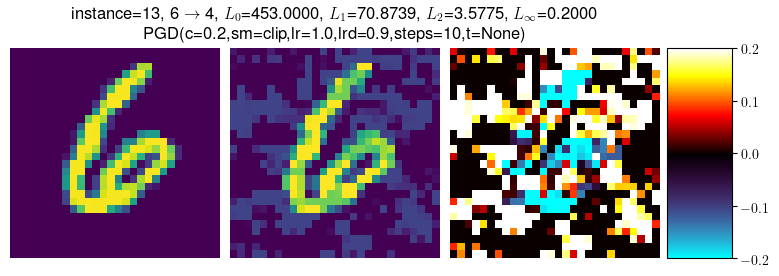

1: 1 -> 8 $L_0$=433.0000, $L_1$=66.9019, $L_2$=3.4572, $L_\infty$=0.2000


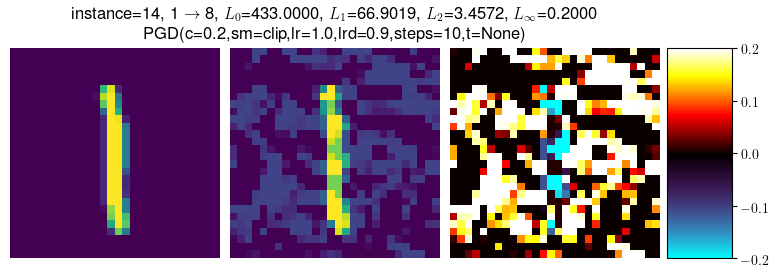

7: 7 -> 9 $L_0$=463.0000, $L_1$=69.6798, $L_2$=3.5425, $L_\infty$=0.2000


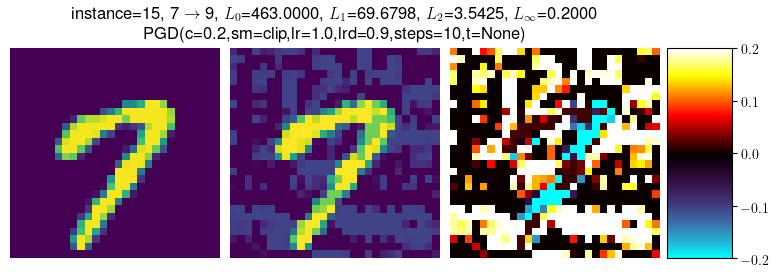

In [5]:
# evasion attack
att = hw4_part1.PGDAttacker(
    model=m,
    num_steps=10,
    target=None,
    learning_rate_decay=0.9,
    learning_rate=1.0,
    step_mode="clip",
    c=0.2
)
att.evaluate(
    X=mnist_data.train.X[0:16*1],
    Y=mnist_data.train.Y[0:16*1],
    display_progress=True
)
show_attack(att, np.arange(0, 16), mnist_data.train)

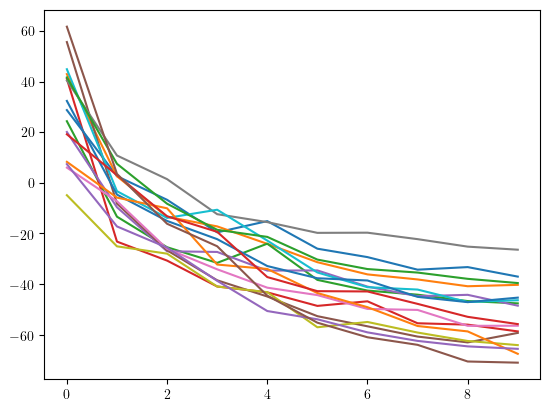

Success rate:  0.4375
Mean Distortion:  $L_0$=72.8571, $L_1$=26.9522, $L_2$=4.5834, $L_\infty$=1.0000


5: 5 -> 5 $L_0$=97.0000, $L_1$=24.7120, $L_2$=3.8507, $L_\infty$=1.0000


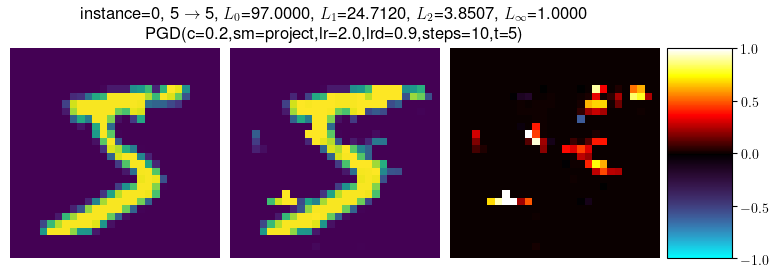

0: 0 -> 0 $L_0$=88.0000, $L_1$=24.5139, $L_2$=4.0103, $L_\infty$=1.0000


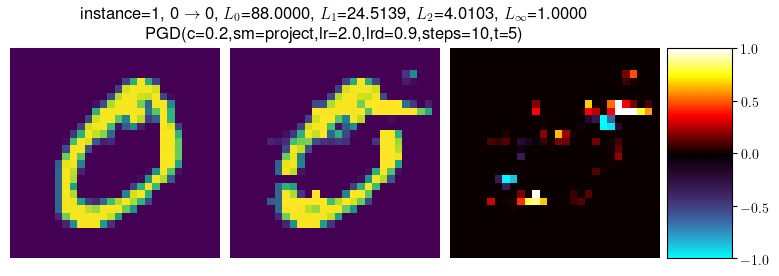

4: 4 -> 5 $L_0$=76.0000, $L_1$=25.3202, $L_2$=4.3401, $L_\infty$=1.0000


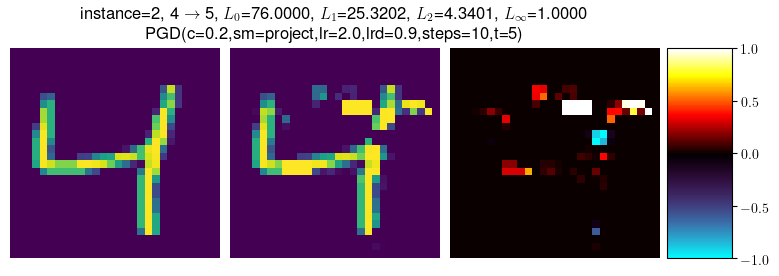

1: 1 -> 5 $L_0$=63.0000, $L_1$=26.3001, $L_2$=4.5896, $L_\infty$=1.0000


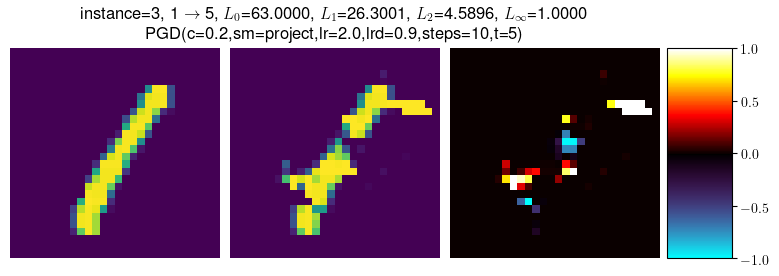

9: 9 -> 9 $L_0$=99.0000, $L_1$=33.1319, $L_2$=4.9233, $L_\infty$=1.0000


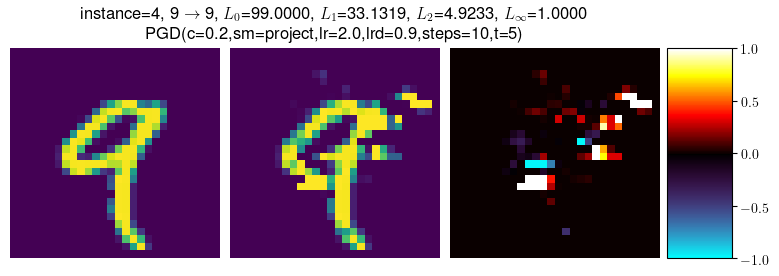

2: 2 -> 2 $L_0$=74.0000, $L_1$=28.2524, $L_2$=4.6868, $L_\infty$=1.0000


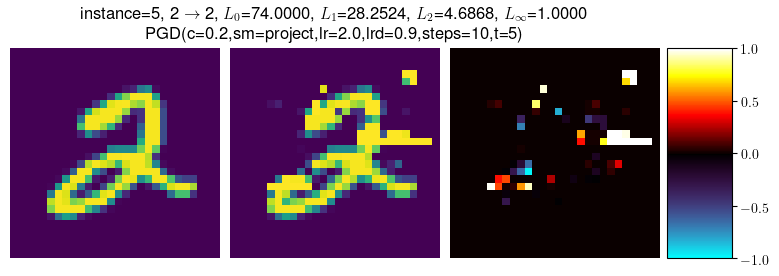

1: 1 -> 5 $L_0$=82.0000, $L_1$=27.8791, $L_2$=4.7983, $L_\infty$=1.0000


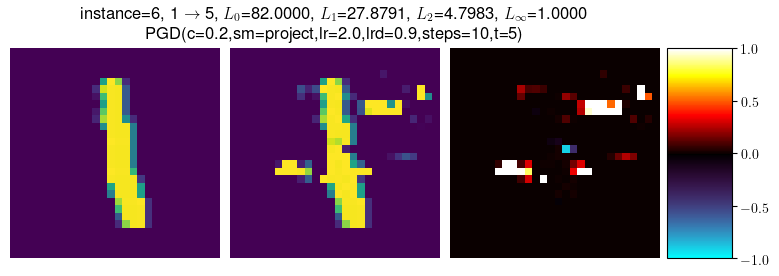

3: 3 -> 3 $L_0$=121.0000, $L_1$=37.0488, $L_2$=5.3111, $L_\infty$=1.0000


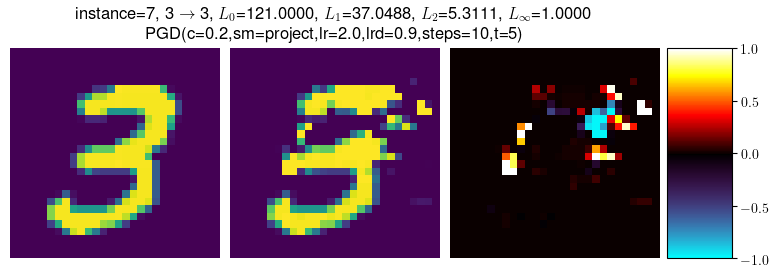

1: 1 -> 5 $L_0$=70.0000, $L_1$=27.2189, $L_2$=4.5624, $L_\infty$=1.0000


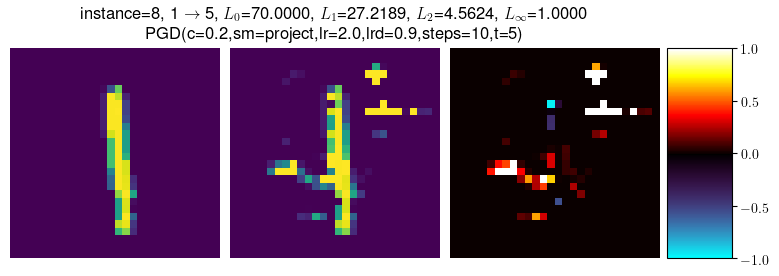

4: 4 -> 5 $L_0$=86.0000, $L_1$=23.4184, $L_2$=4.0695, $L_\infty$=1.0000


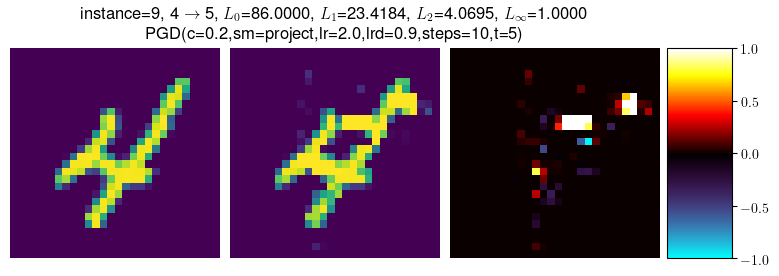

3: 3 -> 5 $L_0$=62.0000, $L_1$=27.4736, $L_2$=4.6010, $L_\infty$=1.0000


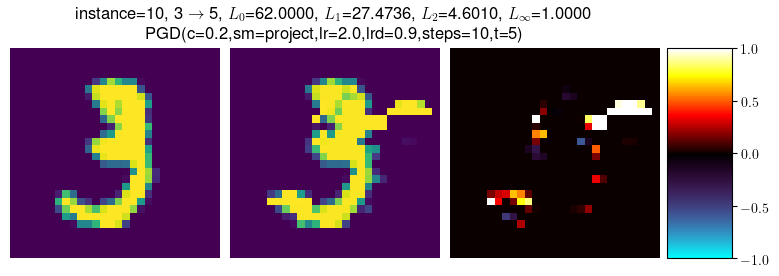

5: 5 -> 5 $L_0$=75.0000, $L_1$=21.8938, $L_2$=3.6661, $L_\infty$=1.0000


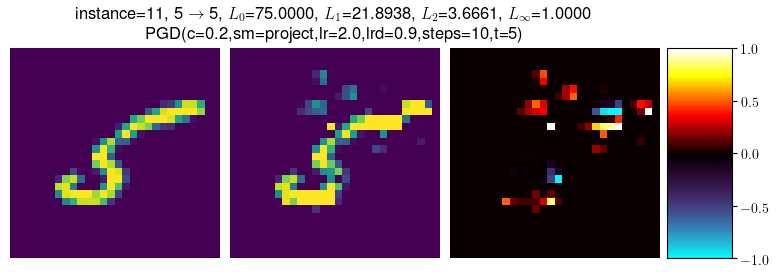

3: 3 -> 3 $L_0$=91.0000, $L_1$=26.0244, $L_2$=4.4738, $L_\infty$=1.0000


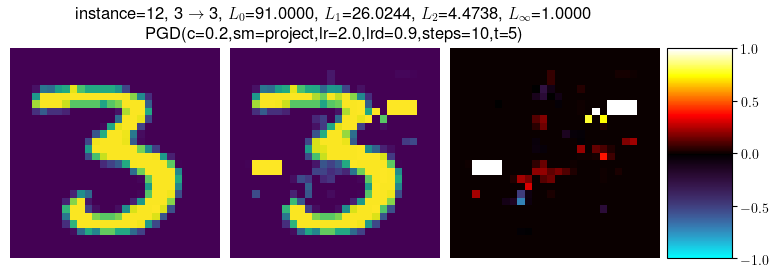

6: 6 -> 6 $L_0$=80.0000, $L_1$=26.8161, $L_2$=4.4299, $L_\infty$=1.0000


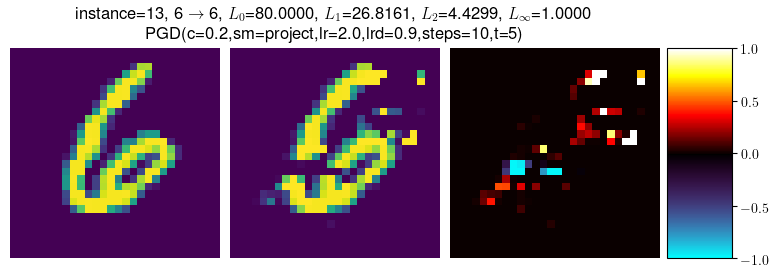

1: 1 -> 5 $L_0$=71.0000, $L_1$=31.0552, $L_2$=5.1232, $L_\infty$=1.0000


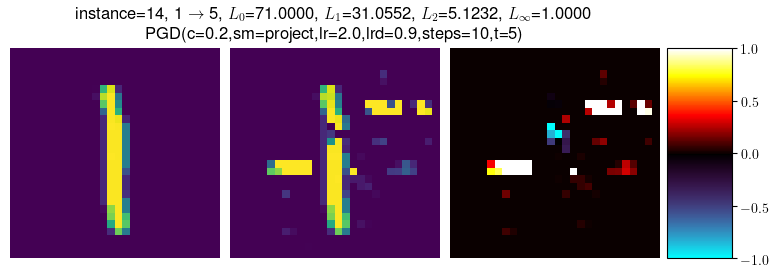

7: 7 -> 9 $L_0$=104.0000, $L_1$=32.0577, $L_2$=4.9691, $L_\infty$=1.0000


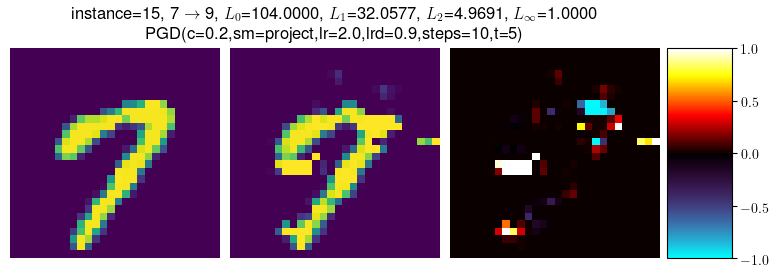

In [6]:
# targetted attack
att = hw4_part1.PGDAttacker(
    model=m,
    num_steps=10,
    target=5,
    learning_rate_decay=0.9,
    learning_rate=2.0,
    step_mode="project",
    c=0.2
)
att.evaluate(
    X=mnist_data.train.X[0:16*1],
    Y=mnist_data.train.Y[0:16*1],
    display_progress=True
)
show_attack(att, np.arange(0, 16), mnist_data.train)

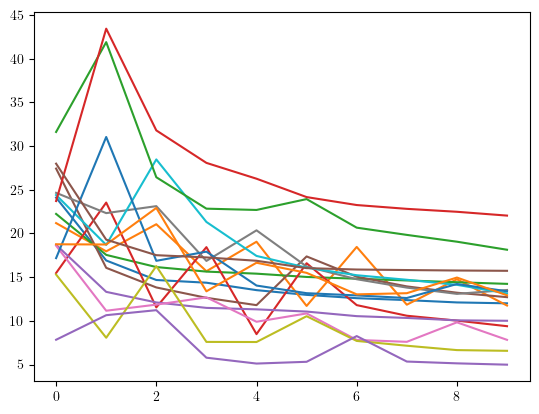

Success rate:  0.75
Mean Distortion:  $L_0$=783.0833, $L_1$=37.8547, $L_2$=3.5309, $L_\infty$=0.9374


5: 5 -> 3 $L_0$=782.0000, $L_1$=35.5135, $L_2$=3.4646, $L_\infty$=0.9297


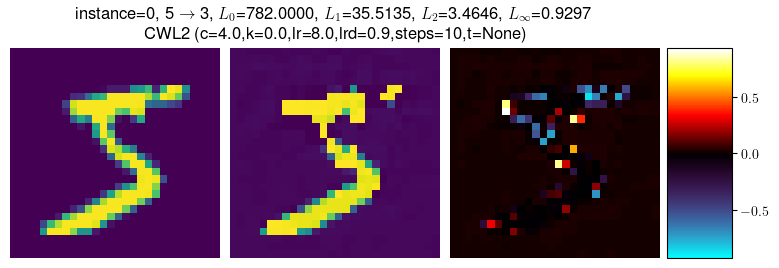

0: 0 -> 2 $L_0$=784.0000, $L_1$=48.1917, $L_2$=3.4211, $L_\infty$=0.7612


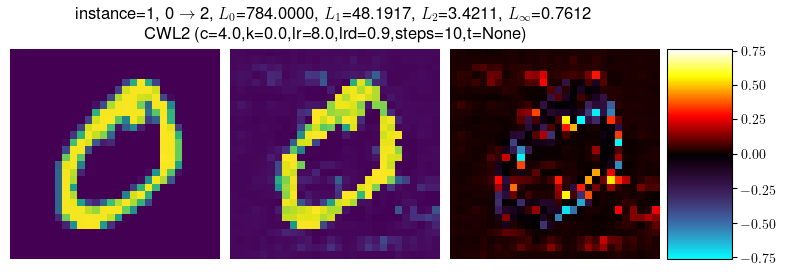

4: 4 -> 7 $L_0$=781.0000, $L_1$=39.7968, $L_2$=3.7721, $L_\infty$=0.9366


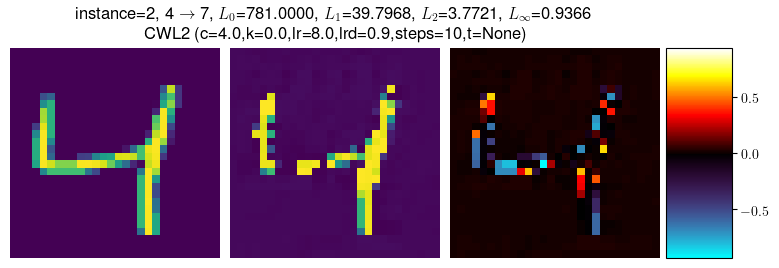

1: 1 -> 1 $L_0$=784.0000, $L_1$=31.2463, $L_2$=2.8427, $L_\infty$=0.9927


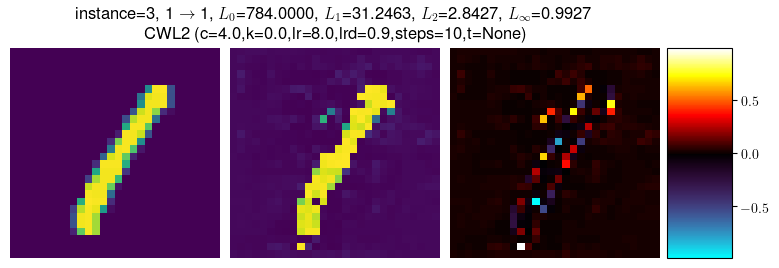

9: 9 -> 7 $L_0$=782.0000, $L_1$=32.2753, $L_2$=3.1633, $L_\infty$=0.8854


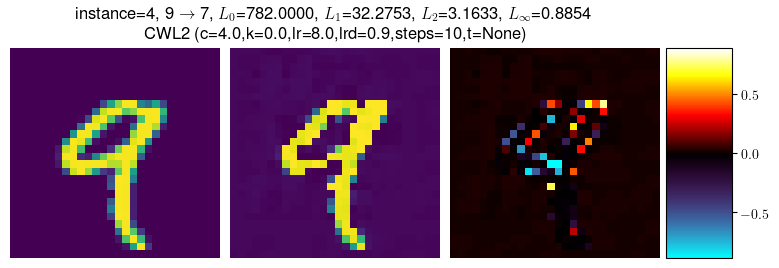

2: 2 -> 2 $L_0$=784.0000, $L_1$=39.7108, $L_2$=3.4195, $L_\infty$=0.9327


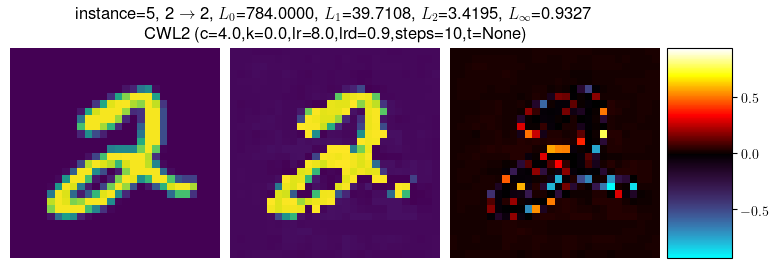

1: 1 -> 1 $L_0$=784.0000, $L_1$=29.5220, $L_2$=2.7245, $L_\infty$=0.8940


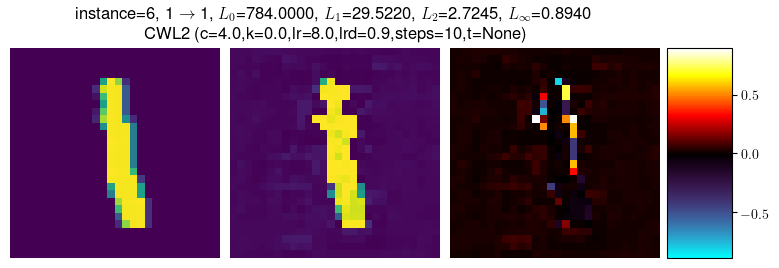

3: 3 -> 8 $L_0$=784.0000, $L_1$=38.6262, $L_2$=3.6171, $L_\infty$=1.0000


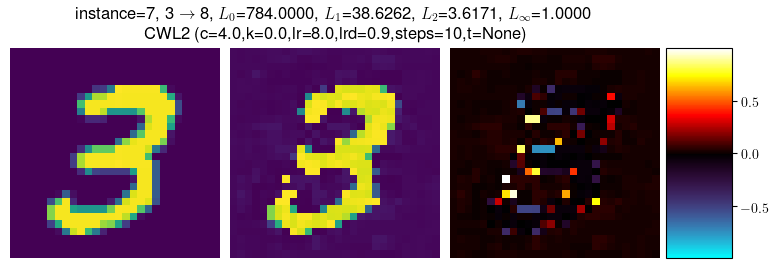

1: 1 -> 8 $L_0$=784.0000, $L_1$=27.9706, $L_2$=2.5629, $L_\infty$=0.9920


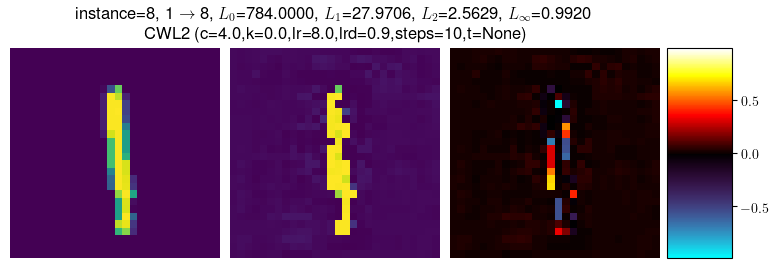

4: 4 -> 7 $L_0$=784.0000, $L_1$=36.6209, $L_2$=3.6244, $L_\infty$=0.9762


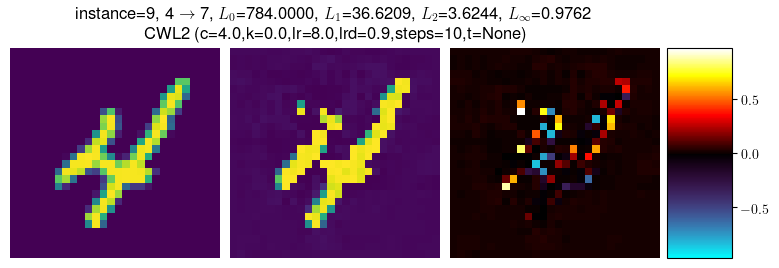

3: 3 -> 3 $L_0$=784.0000, $L_1$=36.3600, $L_2$=3.5434, $L_\infty$=1.0000


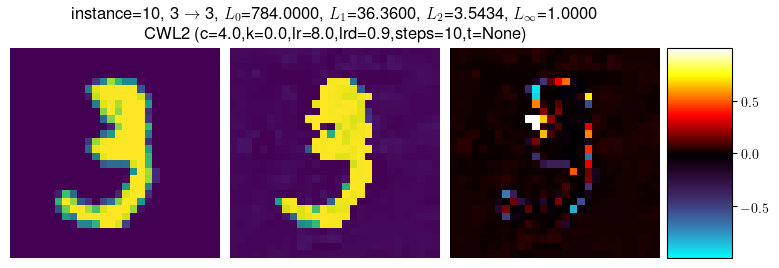

5: 5 -> 8 $L_0$=784.0000, $L_1$=40.6374, $L_2$=3.5946, $L_\infty$=0.9140


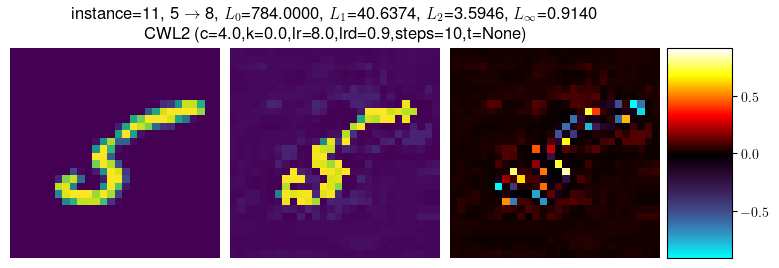

3: 3 -> 8 $L_0$=783.0000, $L_1$=43.5439, $L_2$=4.2583, $L_\infty$=1.0000


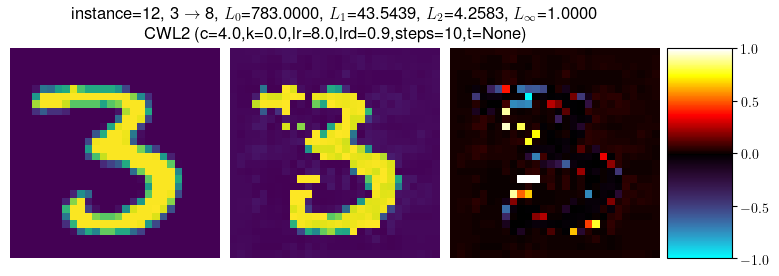

6: 6 -> 0 $L_0$=781.0000, $L_1$=44.9866, $L_2$=4.6946, $L_\infty$=1.0000


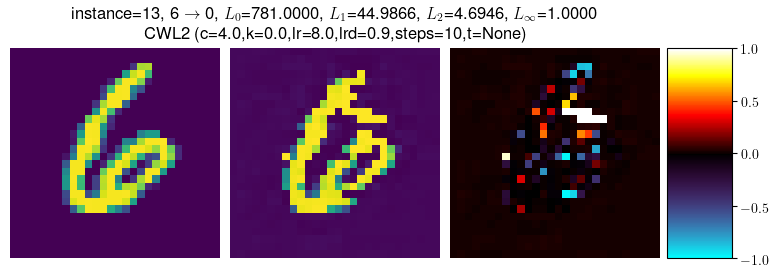

1: 1 -> 8 $L_0$=784.0000, $L_1$=27.0374, $L_2$=2.2325, $L_\infty$=0.9023


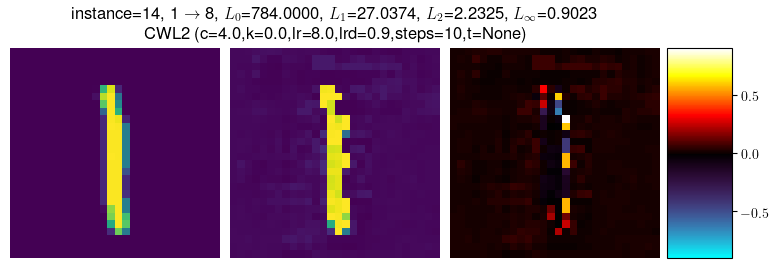

7: 7 -> 9 $L_0$=784.0000, $L_1$=39.0565, $L_2$=3.9651, $L_\infty$=0.9518


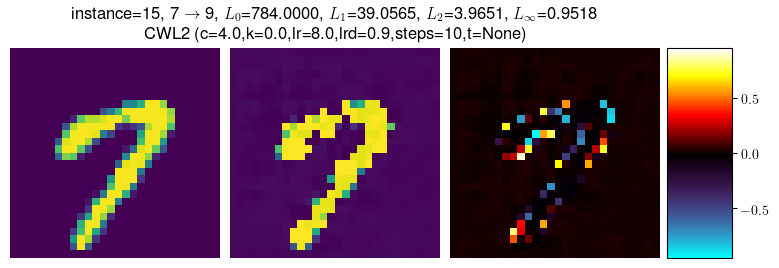

In [7]:
# evasion attack
att = hw4_part1.CWL2Attacker(
    model=m,
    num_steps=10,
    target=None,
    learning_rate=8.0,
    learning_rate_decay=0.9,
    k=0.0,
    c=4.0
)
att.evaluate(
    X=mnist_data.train.X[0:16*1],
    Y=mnist_data.train.Y[0:16*1],
    display_progress=True
)
show_attack(att, np.arange(0, 16), mnist_data.train)

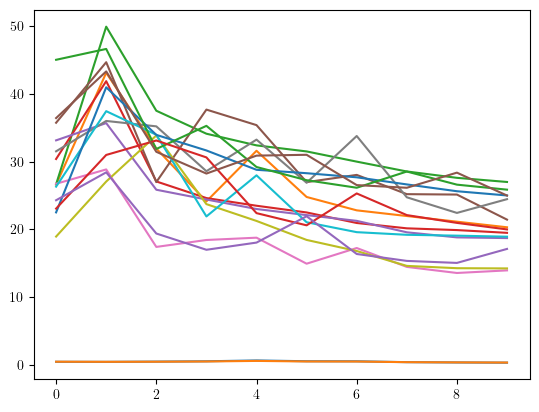

Success rate:  0.625
Mean Distortion:  $L_0$=783.4000, $L_1$=45.6372, $L_2$=4.4622, $L_\infty$=0.9964


5: 5 -> 5 $L_0$=771.0000, $L_1$=14.0901, $L_2$=0.5295, $L_\infty$=0.0259


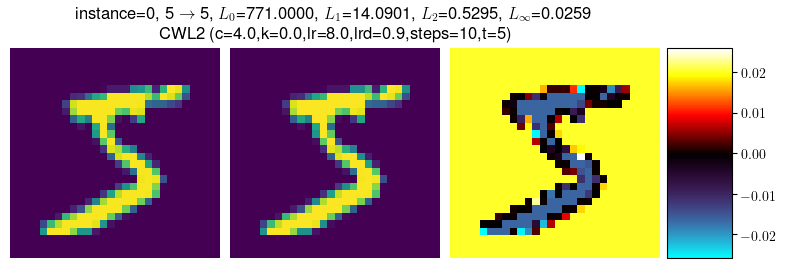

0: 0 -> 5 $L_0$=784.0000, $L_1$=45.8656, $L_2$=4.5040, $L_\infty$=1.0000


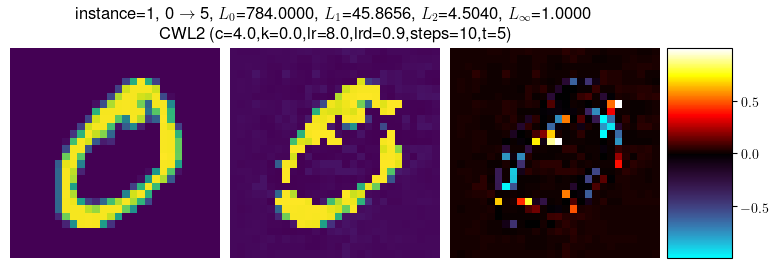

4: 4 -> 4 $L_0$=784.0000, $L_1$=64.1755, $L_2$=5.1448, $L_\infty$=0.9023


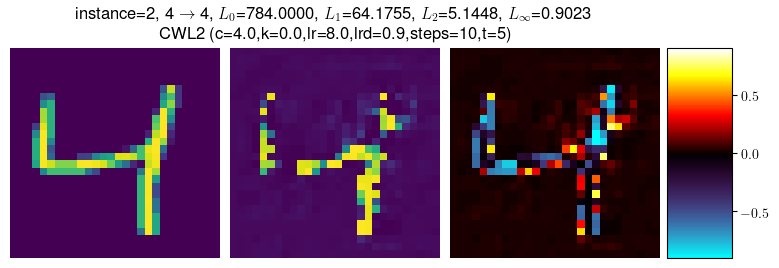

1: 1 -> 5 $L_0$=783.0000, $L_1$=39.9684, $L_2$=4.4119, $L_\infty$=0.9965


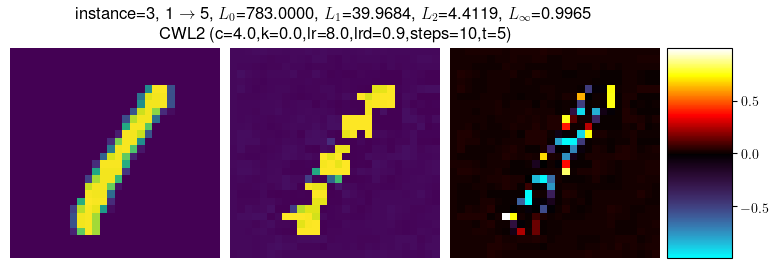

9: 9 -> 9 $L_0$=782.0000, $L_1$=40.2335, $L_2$=4.2485, $L_\infty$=0.9999


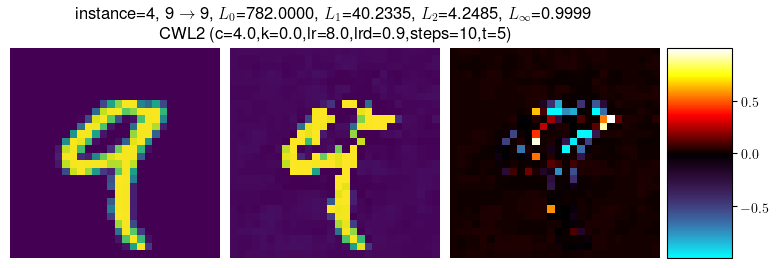

2: 2 -> 5 $L_0$=784.0000, $L_1$=55.2636, $L_2$=4.6278, $L_\infty$=0.9803


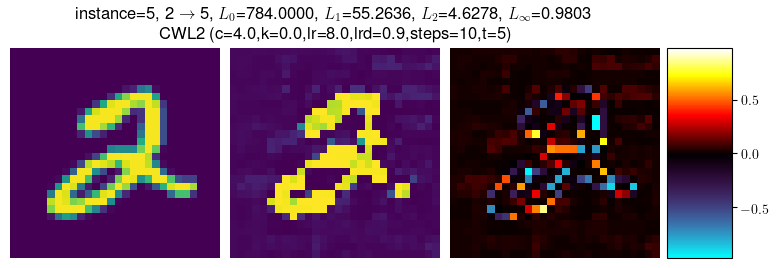

1: 1 -> 5 $L_0$=783.0000, $L_1$=35.7533, $L_2$=3.6788, $L_\infty$=1.0000


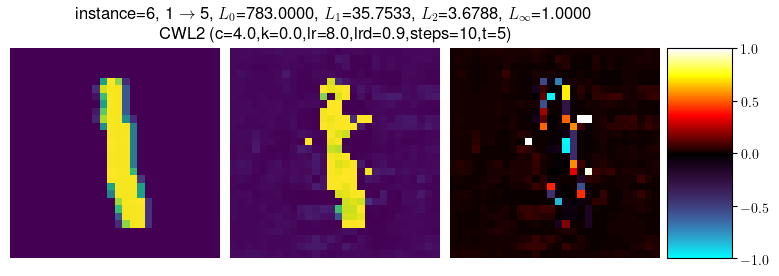

3: 3 -> 5 $L_0$=783.0000, $L_1$=46.7427, $L_2$=4.7337, $L_\infty$=1.0000


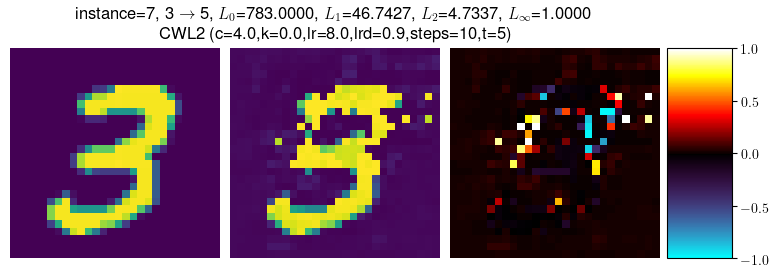

1: 1 -> 5 $L_0$=784.0000, $L_1$=33.1643, $L_2$=3.7692, $L_\infty$=1.0000


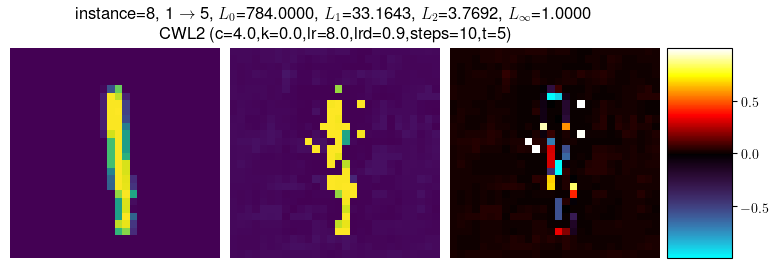

4: 4 -> 5 $L_0$=784.0000, $L_1$=44.1579, $L_2$=4.3470, $L_\infty$=1.0000


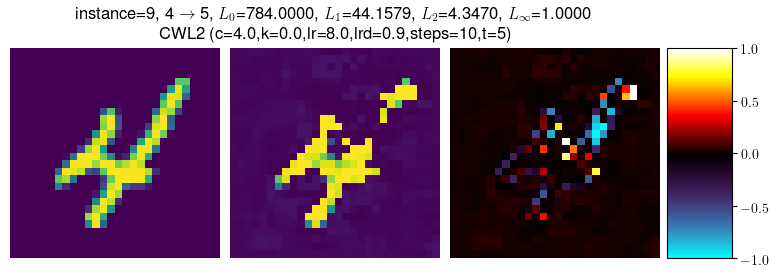

3: 3 -> 3 $L_0$=784.0000, $L_1$=47.9650, $L_2$=3.7017, $L_\infty$=0.9449


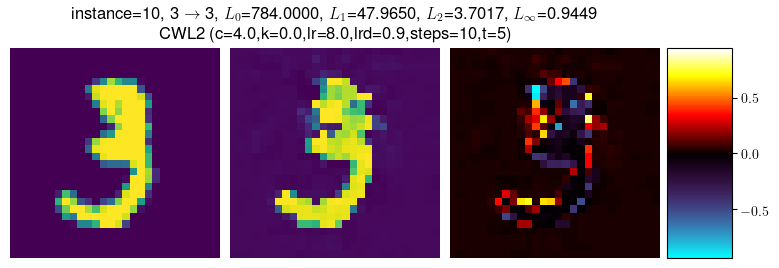

5: 5 -> 5 $L_0$=772.0000, $L_1$=14.8048, $L_2$=0.5461, $L_\infty$=0.0251


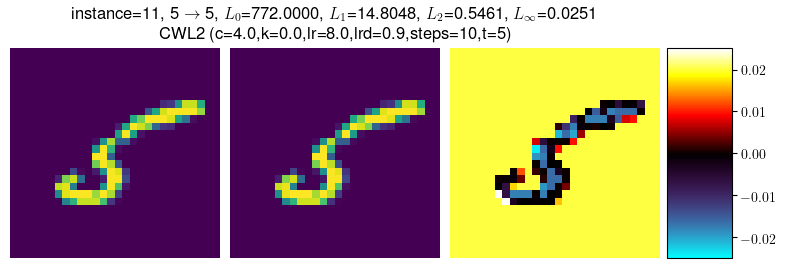

3: 3 -> 5 $L_0$=784.0000, $L_1$=53.0461, $L_2$=5.0838, $L_\infty$=0.9994


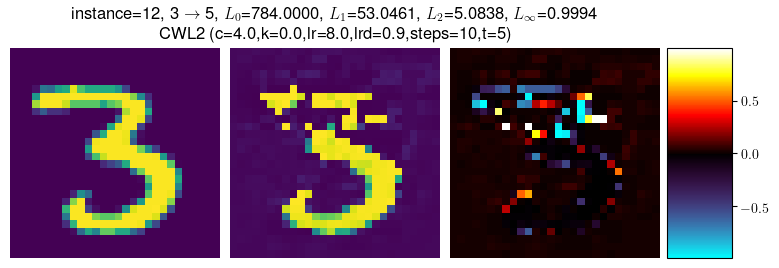

6: 6 -> 5 $L_0$=781.0000, $L_1$=47.9719, $L_2$=4.4686, $L_\infty$=0.9883


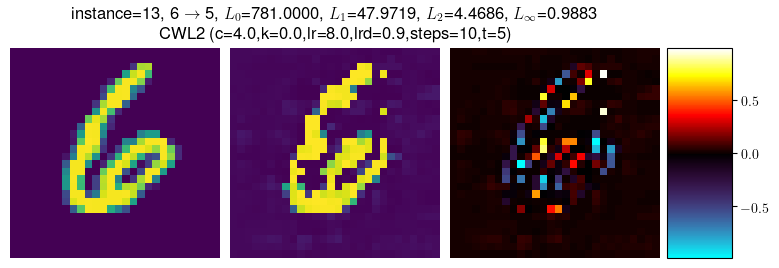

1: 1 -> 8 $L_0$=784.0000, $L_1$=35.0816, $L_2$=3.8199, $L_\infty$=0.9938


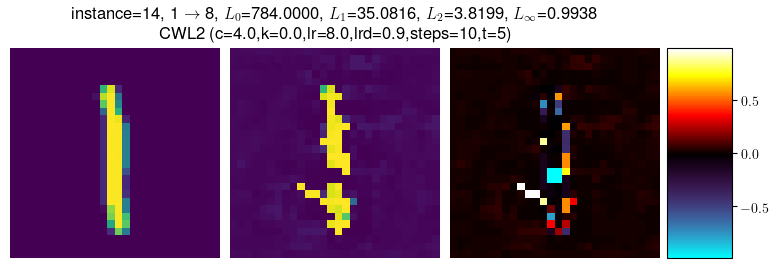

7: 7 -> 5 $L_0$=784.0000, $L_1$=54.4385, $L_2$=4.9973, $L_\infty$=0.9999


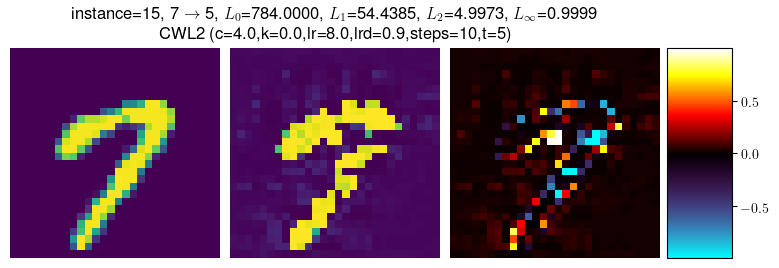

In [8]:
# targetted attack
att = hw4_part1.CWL2Attacker(
    model=m,
    num_steps=10,
    target=5,
    learning_rate=8.0,
    learning_rate_decay=0.9,
    k=0.0,
    c=4.0
)
att.evaluate(
    X=mnist_data.train.X[0:16*1],
    Y=mnist_data.train.Y[0:16*1],
    display_progress=True
)
show_attack(att, np.arange(0, 16), mnist_data.train)

# PART 2

In [9]:
import hw4_mnist
import hw4_part1
import hw4_part2
hw4_part1.tqdm = tqdm
hw4_part2.tqdm = tqdm

In [10]:
def evaluate_defense(
    X, Y,
    model_class=hw4_mnist.MNISTModel, 
    attack_params=dict(
        num_steps=20,
        target=None,
        learning_rate=8.0,
        learning_rate_decay=0.9,
        k=0.0,
        c=4.0
    ),
    attacker_class=hw4_part1.CWL2Attacker,
    sample_size=256,
    defender_class=hw4_part2.AugmentDefender,
    defender_params=dict(finetune=False, epochs=10),
    defend_params=dict(augment_ratio=1.0),
):

    m = model_class()
    m.load()
    
    att = attacker_class(
        model=m,
        **attack_params
    )

    X = X[0:sample_size]
    Y = Y[0:sample_size]
    
    print("=== before defense ===")
    
    # Check prediction performance before defense.
    pre_acc = {sname: (m.f_preds(s.X) == s.Y).mean()
               for sname, s in zip(["train", "test", "valid"], mnist_data)}
    print(pre_acc)
    
    # Check adversarial success before defense.
    pre_s, pre_dist = att.evaluate(X=X, Y=Y)
    
    d = defender_class(
        attacker=att,
        model=m,
        **defender_params
    )
    
    d.defend(
        X, Y,
        **defend_params
    )
    
    att = attacker_class(
        model=d.model,
        **attack_params
    )

    print("=== after defense ===")
    # Check prediction performance after defense.
    post_acc = {sname: (m.f_preds(s.X) == s.Y).mean()
               for sname, s in zip(["train", "test", "valid"], mnist_data)}
    print(post_acc)
    
    # Check adversarial success after the defense.
    # Note that checking on the same set that we defended against
    # might not be a fair check for successful defense.
    post_s, post_dist = att.evaluate(X=X, Y=Y)
    
    plt.close('all')
    
    print("=== defense results ===")
    for sname in pre_acc.keys():
        pre = pre_acc[sname]
        post = post_acc[sname]
        print(f"{sname} acc:\t{pre:0.4f} -> {post:0.4f}\t({post-pre:0.4f} {100 * (post-pre)/pre:0.4f}% change)")
    
    print(f"adv success:\t{100*pre_s:0.4f}% -> {100*post_s:0.4f}%\t({post_s-pre_s:0.4f} {100 * (post_s-pre_s)/pre_s:0.4f}% change)")
    for pre_d, post_d, l in zip(pre_dist, post_dist, ["L0", "L1", "L2", "Linf"]):
        print(f"{l} distortion:\t{pre_d:0.4f} -> {post_d:0.4f}\t({post_d-pre_d:0.4f} {100 * (post_d-pre_d)/pre_d:0.4f}% change)")

In [11]:
evaluate_defense(
    defender_class=hw4_part2.AugmentDefender,
    defender_params=dict(finetune=False, epochs=10),
    X=mnist_data.valid.X,
    Y=mnist_data.valid.Y
)

=== before defense ===
{'train': 0.97784, 'test': 0.981, 'valid': 0.9785}
Target = None evaluation


Success rate:  0.9140625
Mean Distortion:  $L_0$=774.1239, $L_1$=33.0661, $L_2$=3.1819, $L_\infty$=0.9046


Train on 512 samples
Epoch 1/10
512/512 [==============================] - 0s 919us/sample - loss: 2.2347 - acc: 0.1953
Epoch 2/10
512/512 [==============================] - 0s 396us/sample - loss: 1.8715 - acc: 0.4043
Epoch 3/10
512/512 [==============================] - 0s 418us/sample - loss: 1.0595 - acc: 0.7090
Epoch 4/10
512/512 [==============================] - 0s 385us/sample - loss: 0.6483 - acc: 0.7852
Epoch 5/10
512/512 [==============================] - 0s 364us/sample - loss: 0.4539 - acc: 0.8613
Epoch 6/10
512/512 [==============================] - 0s 369us/sample - loss: 0.3236 - acc: 0.9160
Epoch 7/10
512/512 [==============================] - 0s 385us/sample - loss: 0.2534 - acc: 0.9434
Epoch 8/10
512/512 [==============================] - 0s 363us/sample - loss: 0.1961 - acc: 0.9512
Epoch 9/10
512/512 [==============================] - 0s 364us/sample - loss: 0.1528 - acc: 0.9746
Epoch 10/10
512/512 [==============================] - 0s 367us/sample - loss: 0.1076 - 

Success rate:  0.859375
Mean Distortion:  $L_0$=775.7864, $L_1$=30.3483, $L_2$=2.6595, $L_\infty$=0.8641
=== defense results ===
train acc:	0.9778 -> 0.7994	(-0.1784 -18.2463% change)
test acc:	0.9810 -> 0.8296	(-0.1514 -15.4332% change)
valid acc:	0.9785 -> 0.8128	(-0.1657 -16.9341% change)
adv success:	91.4062% -> 85.9375%	(-0.0547 -5.9829% change)
L0 distortion:	774.1239 -> 775.7864	(1.6625 0.2148% change)
L1 distortion:	33.0661 -> 30.3483	(-2.7179 -8.2194% change)
L2 distortion:	3.1819 -> 2.6595	(-0.5224 -16.4174% change)
Linf distortion:	0.9046 -> 0.8641	(-0.0406 -4.4830% change)


In [12]:
evaluate_defense(
    defender_class=hw4_part2.AugmentDefender,
    defender_params=dict(finetune=True, epochs=10),
    X=mnist_data.valid.X,
    Y=mnist_data.valid.Y)

=== before defense ===
{'train': 0.97784, 'test': 0.981, 'valid': 0.9785}
Target = None evaluation


Success rate:  0.9140625
Mean Distortion:  $L_0$=774.1239, $L_1$=33.0661, $L_2$=3.1819, $L_\infty$=0.9046


Train on 256 samples
Epoch 1/10
256/256 [==============================] - 1s 2ms/sample - loss: 1.5823 - acc: 0.4609
Epoch 2/10
256/256 [==============================] - 0s 587us/sample - loss: 0.8569 - acc: 0.6797
Epoch 3/10
256/256 [==============================] - 0s 635us/sample - loss: 0.6156 - acc: 0.7773
Epoch 4/10
256/256 [==============================] - 0s 453us/sample - loss: 0.4565 - acc: 0.8320
Epoch 5/10
256/256 [==============================] - 0s 1ms/sample - loss: 0.3731 - acc: 0.8672
Epoch 6/10
256/256 [==============================] - 0s 595us/sample - loss: 0.3129 - acc: 0.9102
Epoch 7/10
256/256 [==============================] - 0s 445us/sample - loss: 0.2363 - acc: 0.9336
Epoch 8/10
256/256 [==============================] - 0s 496us/sample - loss: 0.1896 - acc: 0.9531
Epoch 9/10
256/256 [==============================] - 0s 547us/sample - loss: 0.1524 - acc: 0.9609
Epoch 10/10
256/256 [==============================] - 0s 459us/sample - loss: 0.1342 - acc:

Success rate:  0.8203125
Mean Distortion:  $L_0$=777.8000, $L_1$=35.4027, $L_2$=3.3501, $L_\infty$=0.9291
=== defense results ===
train acc:	0.9778 -> 0.9548	(-0.0231 -2.3603% change)
test acc:	0.9810 -> 0.9579	(-0.0231 -2.3547% change)
valid acc:	0.9785 -> 0.9558	(-0.0227 -2.3199% change)
adv success:	91.4062% -> 82.0312%	(-0.0938 -10.2564% change)
L0 distortion:	774.1239 -> 777.8000	(3.6761 0.4749% change)
L1 distortion:	33.0661 -> 35.4027	(2.3366 7.0663% change)
L2 distortion:	3.1819 -> 3.3501	(0.1682 5.2867% change)
Linf distortion:	0.9046 -> 0.9291	(0.0244 2.7019% change)


In [13]:
evaluate_defense(
    defender_class=hw4_part2.PreMadryDefender,
    defender_params=dict(finetune=False, epochs=10),
    defend_params=dict(),
    X=mnist_data.valid.X,
    Y=mnist_data.valid.Y
)

=== before defense ===
{'train': 0.97784, 'test': 0.981, 'valid': 0.9785}
Target = None evaluation


Success rate:  0.9140625
Mean Distortion:  $L_0$=774.1239, $L_1$=33.0661, $L_2$=3.1819, $L_\infty$=0.9046


=== after defense ===
{'train': 0.75408, 'test': 0.7787, 'valid': 0.7698}
Target = None evaluation


Success rate:  0.7109375
Mean Distortion:  $L_0$=772.0165, $L_1$=26.0210, $L_2$=1.7716, $L_\infty$=0.6435
=== defense results ===
train acc:	0.9778 -> 0.7541	(-0.2238 -22.8831% change)
test acc:	0.9810 -> 0.7787	(-0.2023 -20.6218% change)
valid acc:	0.9785 -> 0.7698	(-0.2087 -21.3286% change)
adv success:	91.4062% -> 71.0938%	(-0.2031 -22.2222% change)
L0 distortion:	774.1239 -> 772.0165	(-2.1074 -0.2722% change)
L1 distortion:	33.0661 -> 26.0210	(-7.0451 -21.3061% change)
L2 distortion:	3.1819 -> 1.7716	(-1.4103 -44.3233% change)
Linf distortion:	0.9046 -> 0.6435	(-0.2611 -28.8631% change)


In [14]:
evaluate_defense(
    defender_class=hw4_part2.PreMadryDefender,
    defender_params=dict(finetune=True, epochs=10),
    defend_params=dict(),
    X=mnist_data.valid.X,
    Y=mnist_data.valid.Y
)

=== before defense ===
{'train': 0.97784, 'test': 0.981, 'valid': 0.9785}
Target = None evaluation


Success rate:  0.9140625
Mean Distortion:  $L_0$=774.1239, $L_1$=33.0661, $L_2$=3.1819, $L_\infty$=0.9046


=== after defense ===
{'train': 0.9399, 'test': 0.9506, 'valid': 0.9457}
Target = None evaluation


Success rate:  0.765625
Mean Distortion:  $L_0$=778.5306, $L_1$=37.4606, $L_2$=3.3908, $L_\infty$=0.9085
=== defense results ===
train acc:	0.9778 -> 0.9399	(-0.0379 -3.8800% change)
test acc:	0.9810 -> 0.9506	(-0.0304 -3.0989% change)
valid acc:	0.9785 -> 0.9457	(-0.0328 -3.3521% change)
adv success:	91.4062% -> 76.5625%	(-0.1484 -16.2393% change)
L0 distortion:	774.1239 -> 778.5306	(4.4067 0.5693% change)
L1 distortion:	33.0661 -> 37.4606	(4.3944 13.2899% change)
L2 distortion:	3.1819 -> 3.3908	(0.2089 6.5654% change)
Linf distortion:	0.9046 -> 0.9085	(0.0039 0.4291% change)


## PART 3

In [15]:
import hw4_part3
hw4_part3.tqdm = tqdm

In [16]:
def visualize_coeffs(
    rep
):
    # Visualize the bottom and top coefficients for each target class.
    
    train_X = rep.X
    train_Y = rep.Ytrue
    
    m = rep.model
    coeffs = rep.coeffs()
    preds = m.f_preds(train_X)
    
    for target_class in range(0,10):
        coeffs_target = coeffs[:, target_class]
    
        coeffs_sort = np.argsort(coeffs_target)

        top = coeffs_sort[len(coeffs_sort)-4: len(coeffs_sort)]
        bot = coeffs_sort[0: 4]
    
        fig, axs = plt.subplots(1,8, figsize=(16,3.5))
        fig.suptitle(f"bot/top coeffs for class {target_class} ($\\lambda$={m.lam})")
    
        for i, idx in enumerate([*bot, *top]):
            x = train_X[idx]
            y = train_Y[idx]
            pred = preds[idx]
        
            disp_coeff = len(train_X)*coeffs_target[idx]
        
            axs[i].imshow(x[:,:,0])
            axs[i].set_title(
                f"instance {idx}\nclass {y}, pred {pred}\n$n\\alpha$={disp_coeff:0.8f}"
            )
        
        display(fig)
        plt.close(fig)
        
    plt.close('all')

def visualize_similarity(
    rep,
    explain_X, explain_Y,
    iname
):
    # Visualize the bottom and top representer points for each instance in 
    # explain_X just based on their similarity.
    
    train_X = rep.X
    train_Y = rep.Ytrue
    
    sims = rep.similarity(explain_X)
    preds = m.f_preds(explain_X)
    
    for i, x, y, pred, sim in zip(range(len(explain_X)), explain_X, explain_Y, preds, sims):
        fig, axs = plt.subplots(1,7, figsize=(14,3.5))
        fig.suptitle(f"bot/top similarity to {iname} instance {i} ($\\lambda$={m.lam})")
        
        axs[3].imshow(x[:,:,0])
        axs[3].set_title(f"target\nclass {y}\npred {pred}")
        
        sim_sorted = np.argsort(sim)

        top = sim_sorted[len(sim_sorted)-4:len(sim_sorted)]
        bot = sim_sorted[0:4]

        for i in range(3):
            idx = bot[i]
            tx = train_X[idx]
            ty = train_Y[idx]
            axs[i].imshow(tx[:,:,0])
            axs[i].set_title(f"instance {idx}\nclass {ty}\n$f_i f_t$={sim[idx]:0.5f}")
        
        for i in range(3):
            idx = top[i]
            tx = train_X[idx]
            ty = train_Y[idx]
            axs[i+4].imshow(tx[:,:,0])
            axs[i+4].set_title(f"instance {idx}\nclass {ty}\n$f_i f_t$={sim[idx]:0.5f}")
        
        display(fig)
        plt.close(fig)
        
    plt.close('all')
        
def visualize_representers(
    rep,
    explain_X, explain_Y,
    iname,
):
    # Visualize the bottom and top representer points for each instance in explain_X.
    
    train_X = rep.X
    train_Y = rep.Ytrue
    
    _, vals = rep.coeffs_and_values(explain_X)
    preds = m.f_preds(explain_X)
    
    for i, x, y, pred, v in zip(range(len(explain_X)), explain_X, explain_Y, preds, vals):
        fig, axs = plt.subplots(1,7, figsize=(14,3.5))
        fig.suptitle(f"bot/top representers for {iname} instance {i} ($\\lambda$={m.lam})")
        
        axs[3].imshow(x[:,:,0])
        axs[3].set_title(f"target\nclass {y}\npred {pred}")
    
        vt = v[:, pred] # will visualize impact on predicted class only
          
        top = np.argsort(vt)[len(vt)-5:len(vt)]
        bot = np.argsort(vt)[0:5]

        for i in range(3):
            idx = bot[i]
            tx = train_X[idx]
            ty = train_Y[idx]
            disp_val = len(train_X)*vt[idx]
            axs[i].imshow(tx[:,:,0])
            axs[i].set_title(f"instance {idx}\nclass {ty}\n$nk$={disp_val:0.6f}")
        
        for i in range(3):
            idx = top[i]
            tx = train_X[idx]
            ty = train_Y[idx]
            disp_val = len(train_X)*vt[idx]
            axs[i+4].imshow(tx[:,:,0])
            axs[i+4].set_title(f"instance {idx}\nclass {ty}\n$nk$={disp_val:0.6f}")
        
        display(fig)
        plt.close(fig)
        
    plt.close('all')

In [17]:
m = hw4_part3.MNISTModelRegular(lam=0.1)
#m._prepare_model() # retrain and save model
m.load()

r = hw4_part3.Representer(
    m,
    mnist_data.train.X,
    mnist_data.train.Y
)

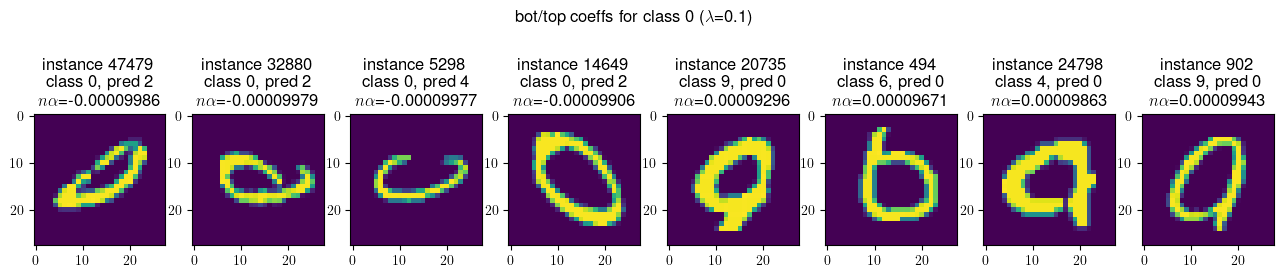

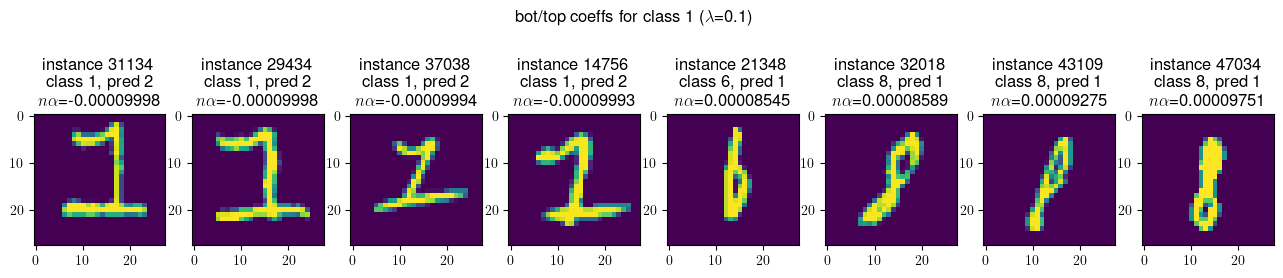

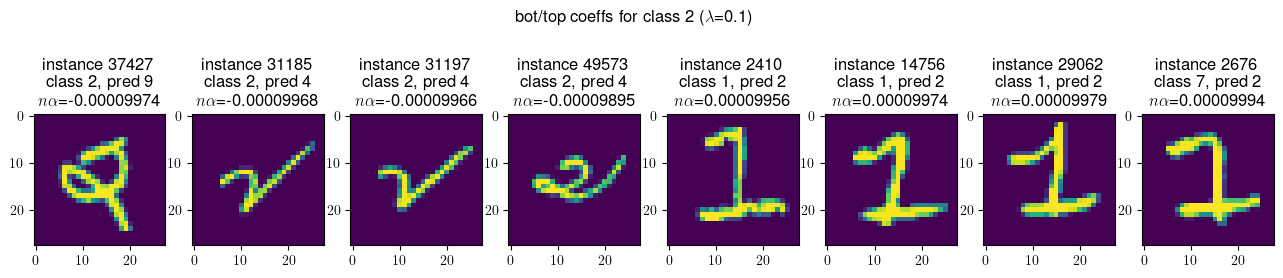

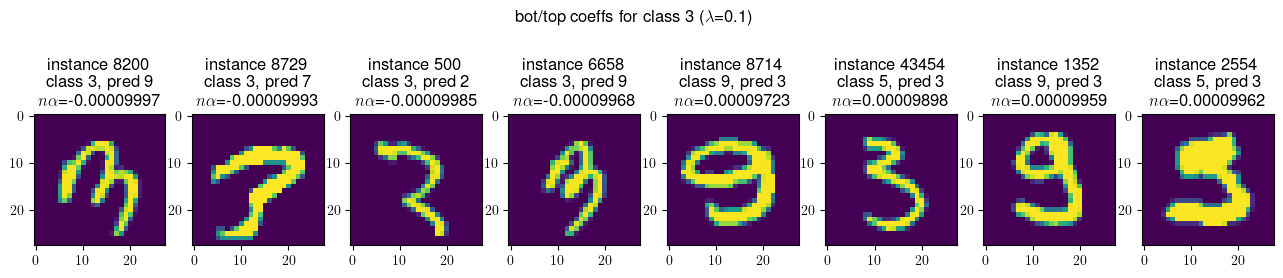

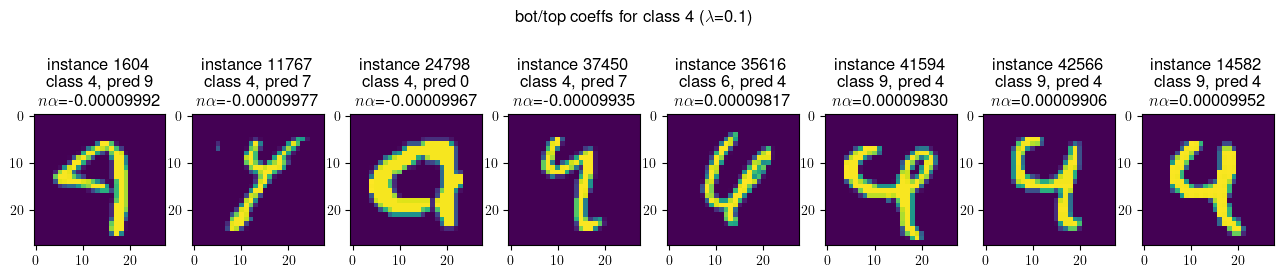

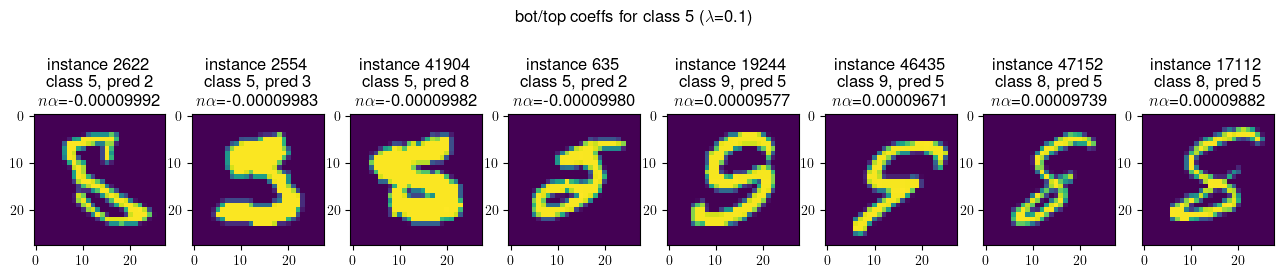

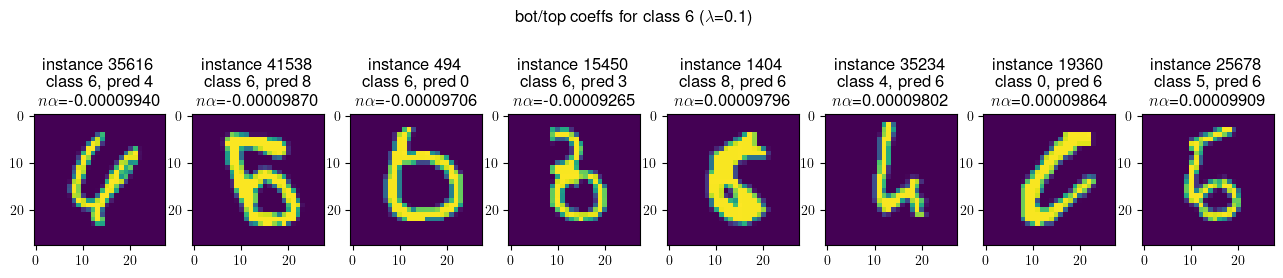

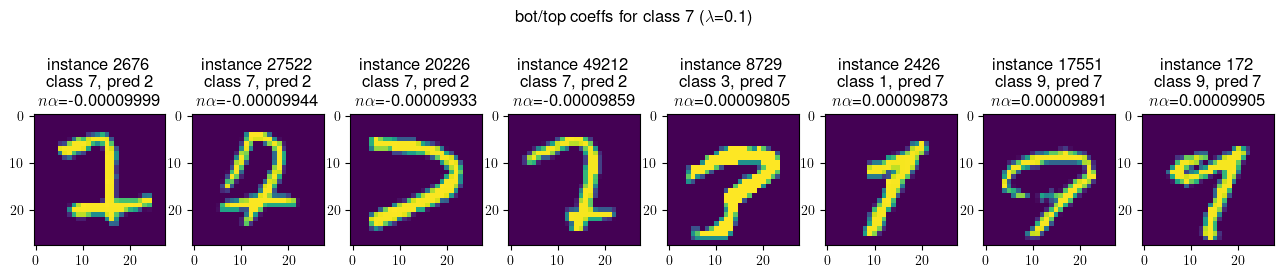

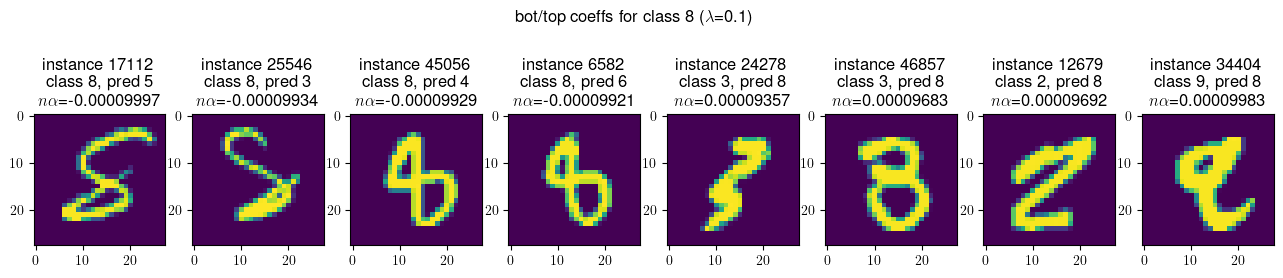

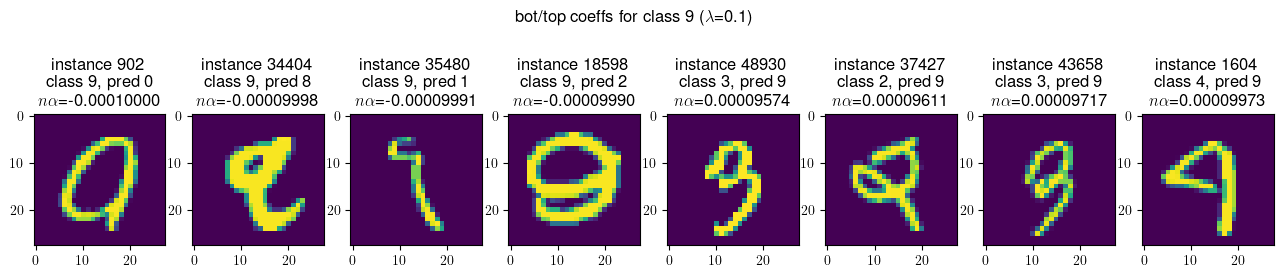

In [18]:
visualize_coeffs(r)

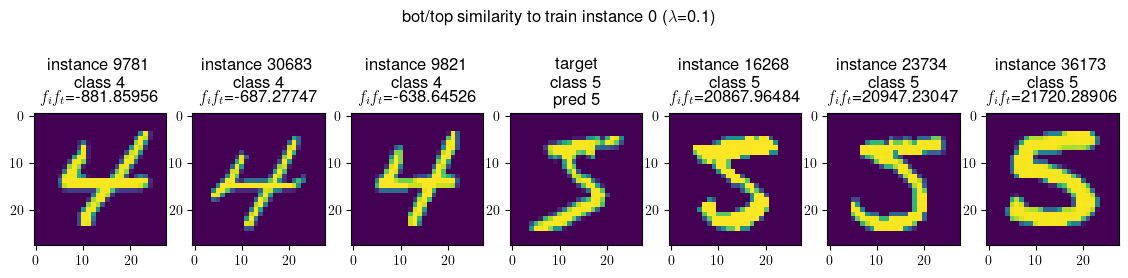

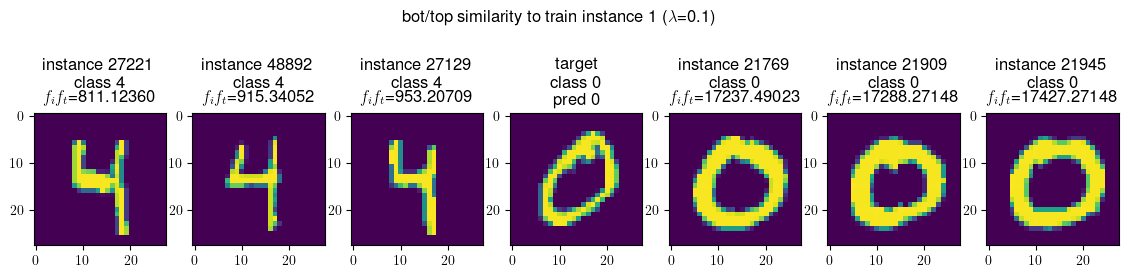

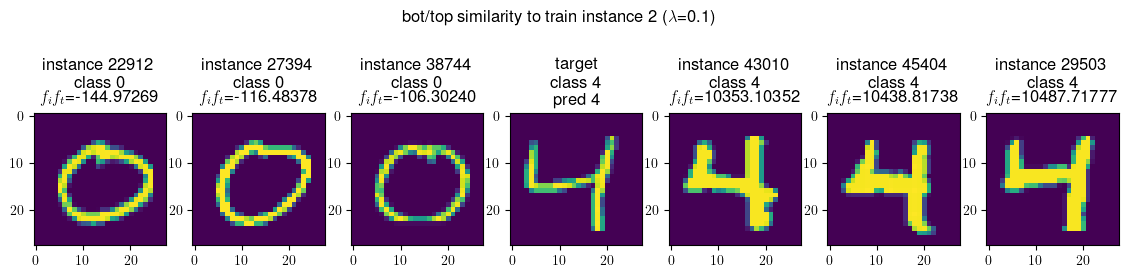

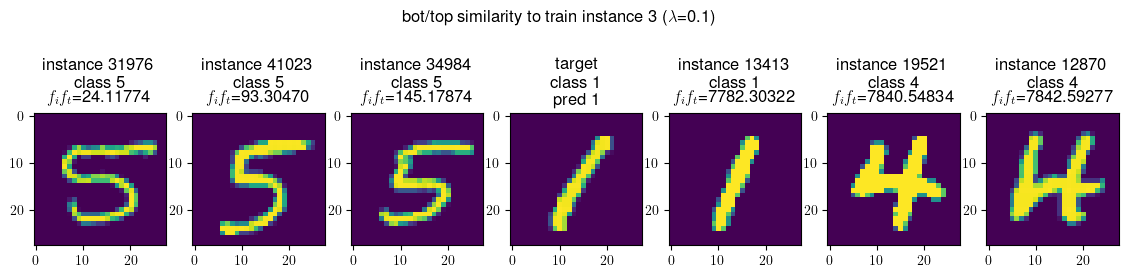

In [19]:
visualize_similarity(
    r,
    mnist_data.train.X[0:4],
    mnist_data.train.Y[0:4],
    iname="train"
)

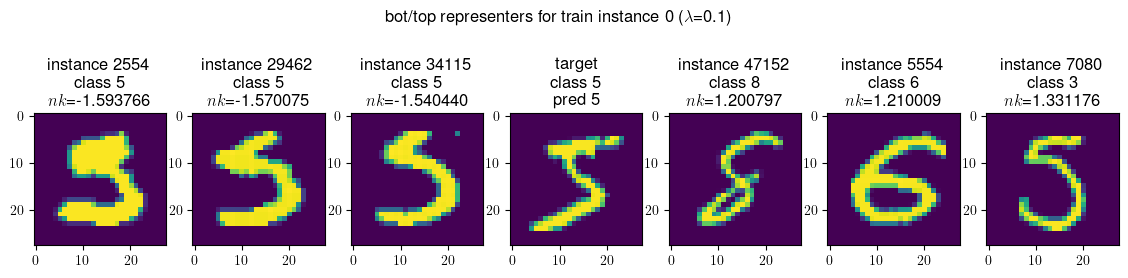

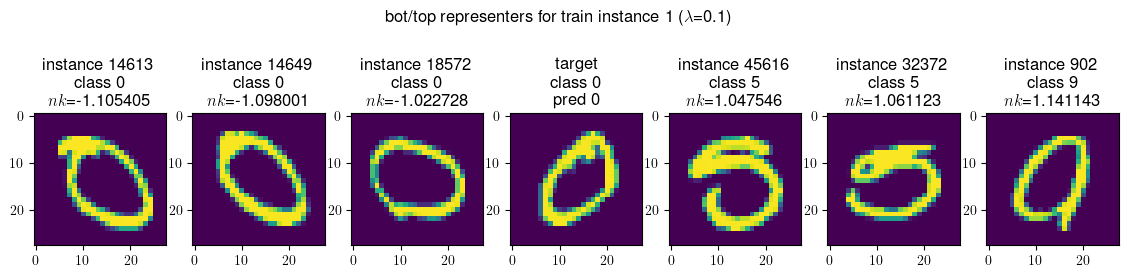

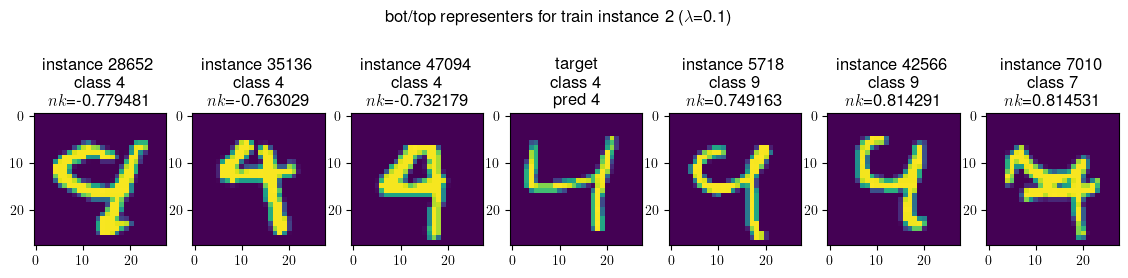

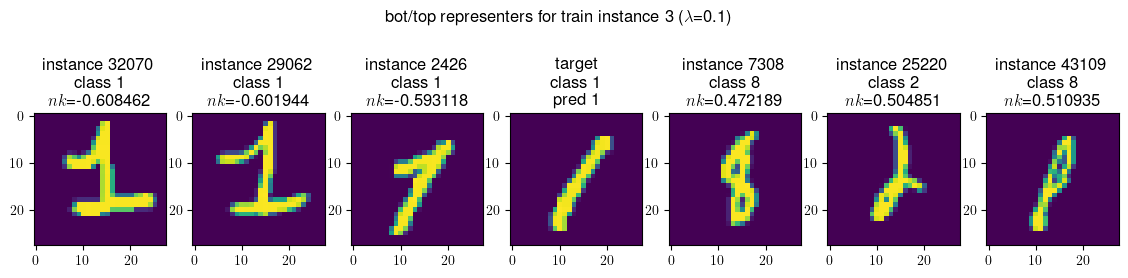

In [20]:
visualize_representers(
    r,
    mnist_data.train.X[0:4],
    mnist_data.train.Y[0:4],
    iname="train"
)